In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing Data

In [2]:
data=pd.read_csv("Car-details-v3.csv")

last five rows of data using tail()

In [3]:
data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Number of rows and columns

In [4]:
data.shape

(8128, 13)

Data Information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 539.8+ KB


In [6]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

Removing unwanted strings in numerical columns

In [7]:
data['mileage'] = data['mileage'].str.replace('kmpl', '')

In [8]:
data['mileage'] = data['mileage'].str.replace('km/kg','')

In [9]:
data['engine'] = data['engine'].str.replace('CC', '')

In [10]:
data['max_power'] = data['max_power'].str.replace('bhp', '')

Checking null values

In [11]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

Remove and replacing the null values 

In [12]:
data['mileage'].fillna(method='ffill', inplace=True)

In [13]:
data['engine'].fillna(method='ffill', inplace=True)

In [14]:
data['max_power'].fillna(method='ffill', inplace=True)

In [15]:
data['max_power'] = pd.to_numeric(data['max_power'], errors='coerce')

In [16]:
print(data['torque'].mode())


0    190Nm@ 2000rpm
dtype: object


In [17]:
data['torque'].fillna(data['torque'].mode()[0], inplace=True)


In [18]:
data['seats'].fillna(data['seats'].median(), inplace=True)

Converting object into int and float 

In [19]:
data['mileage'] = data['mileage'].astype(str).astype(float)

In [20]:
data['engine'] = data['engine'].astype(str).astype(int)

In [21]:
data['max_power'] = data['max_power'].astype(str).astype(float)

Rename the column names

In [22]:
data=data.rename(columns={'mileage':'mileage(kmpl)','engine':'engine(CC)','max_power':'max_power(bhp)'})

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8128 non-null   object 
 1   year            8128 non-null   int64  
 2   selling_price   8128 non-null   int64  
 3   km_driven       8128 non-null   int64  
 4   fuel            8128 non-null   object 
 5   seller_type     8128 non-null   object 
 6   transmission    8128 non-null   object 
 7   owner           8128 non-null   object 
 8   mileage(kmpl)   8128 non-null   float64
 9   engine(CC)      8128 non-null   int32  
 10  max_power(bhp)  8127 non-null   float64
 11  torque          8128 non-null   object 
 12  seats           8128 non-null   float64
dtypes: float64(3), int32(1), int64(3), object(6)
memory usage: 603.3+ KB


In [24]:
data.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage(kmpl)     0
engine(CC)        0
max_power(bhp)    1
torque            0
seats             0
dtype: int64

In [25]:
data = data.dropna(axis = 0, how ='any')


In [26]:
cars=data.copy()

In [27]:
data.isnull().sum()


name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage(kmpl)     0
engine(CC)        0
max_power(bhp)    0
torque            0
seats             0
dtype: int64

##### Statistical distributions

In [28]:
# statistical measures about the data
data.describe()

,year,selling_price,km_driven,mileage(kmpl),engine(CC),max_power(bhp),seats
count,8127.000000,8.127000e+03,8.127000e+03,8127.000000,8127.000000,8127.000000,8127.000000
mean,2013.805709,6.383405e+05,6.981580e+04,19.405778,1458.110127,91.333944,5.405070
std,4.041597,8.062792e+05,5.655304e+04,4.047554,504.383435,35.745389,0.948496
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [29]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(bhp),torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [30]:
data['name']=data['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [31]:
data.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(bhp),torque,seats
0,Maruti Swift Dzire,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0


In [32]:
data['model']=data['name'].str.split().str.get(1)


In [33]:
data['name']=data['name'].str.split().str.get(0)


In [34]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(bhp),torque,seats,model
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0,Swift
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,Rapid
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,City
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0,i20
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,Swift


In [35]:
data.to_csv('cleaned cardekho.csv')


In [36]:
col_names=['fuel','seller_type','transmission','owner','torque']
for col in col_names:
    print(data[col].value_counts())

Diesel    4402
Petrol    3631
CNG         56
LPG         38
Name: fuel, dtype: int64
Individual          6765
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64
Manual       7077
Automatic    1050
Name: transmission, dtype: int64
First Owner             5289
Second Owner            2104
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64
190Nm@ 2000rpm             751
200Nm@ 1750rpm             445
90Nm@ 3500rpm              405
113Nm@ 4200rpm             223
114Nm@ 4000rpm             171
                          ... 
128Nm@ 3100rpm               1
72.9Nm@ 2250rpm              1
155 Nm at 1600-2800 rpm      1
510Nm@ 1600-2800rpm          1
96  Nm at 3000  rpm          1
Name: torque, Length: 441, dtype: int64


In [37]:
df=data.copy()


# convert categorical data into numerical data


In [38]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["fuel"] = ord_enc.fit_transform(df[["fuel"]])
df["seller_type"] = ord_enc.fit_transform(df[["seller_type"]])
df["transmission"] = ord_enc.fit_transform(df[["transmission"]])
df["owner"] = ord_enc.fit_transform(df[["owner"]])
df["torque"] = ord_enc.fit_transform(df[["torque"]])


In [39]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(bhp),torque,seats,model
0,Maruti,2014,450000,145500,1.0,1.0,1.0,0.0,23.40,1248,74.00,178.0,5.0,Swift
1,Skoda,2014,370000,120000,1.0,1.0,1.0,2.0,21.14,1498,103.52,260.0,5.0,Rapid
2,Honda,2006,158000,140000,3.0,1.0,1.0,4.0,17.70,1497,78.00,66.0,5.0,City
3,Hyundai,2010,225000,127000,1.0,1.0,1.0,0.0,23.00,1396,90.00,224.0,5.0,i20
4,Maruti,2007,130000,120000,3.0,1.0,1.0,0.0,16.10,1298,88.20,21.0,5.0,Swift


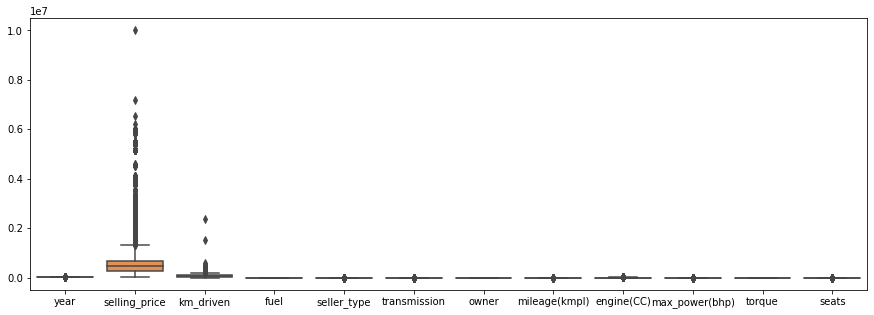

In [40]:
plt.figure(figsize = (15,5))
sns.boxplot(data=df)
plt.show()

from the above boxplot we can see that selling_price has outliers


In [41]:
Q1 = np.percentile(df['selling_price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['selling_price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['selling_price'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['selling_price'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (8127, 14)
New Shape:  (7527, 14)


In [42]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(bhp),torque,seats,model
0,Maruti,2014,450000,145500,1.0,1.0,1.0,0.0,23.40,1248,74.00,178.0,5.0,Swift
1,Skoda,2014,370000,120000,1.0,1.0,1.0,2.0,21.14,1498,103.52,260.0,5.0,Rapid
2,Honda,2006,158000,140000,3.0,1.0,1.0,4.0,17.70,1497,78.00,66.0,5.0,City
3,Hyundai,2010,225000,127000,1.0,1.0,1.0,0.0,23.00,1396,90.00,224.0,5.0,i20
4,Maruti,2007,130000,120000,3.0,1.0,1.0,0.0,16.10,1298,88.20,21.0,5.0,Swift


In [43]:
df.shape

(7527, 14)

###### Exploratory Data Analysis

<AxesSubplot:xlabel='year', ylabel='Density'>

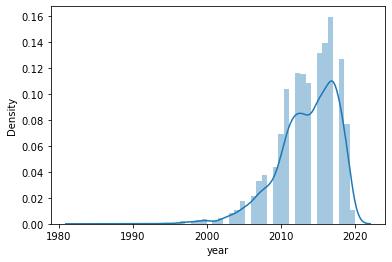

In [44]:
sns.distplot(df['year'])


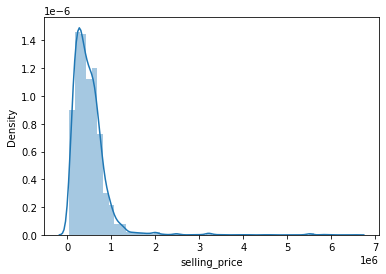

In [45]:
sns.distplot(df['selling_price'])
plt.show()

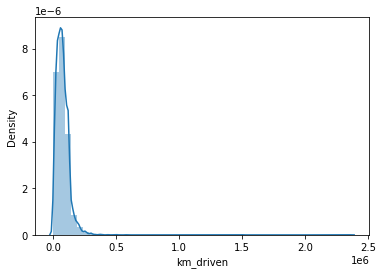

In [46]:
sns.distplot(df['km_driven'])
plt.show()

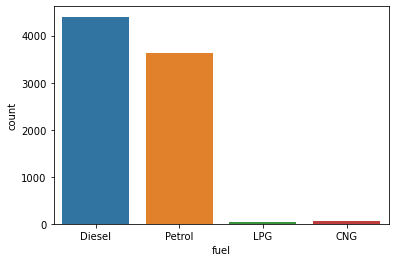

In [47]:
sns.countplot(data['fuel'])
plt.show()

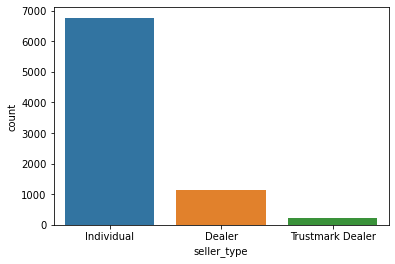

In [48]:
sns.countplot(data['seller_type'])
plt.show()

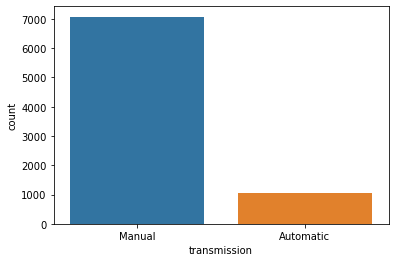

In [49]:
sns.countplot(data['transmission'])
plt.show()

###### Bivarate analysis


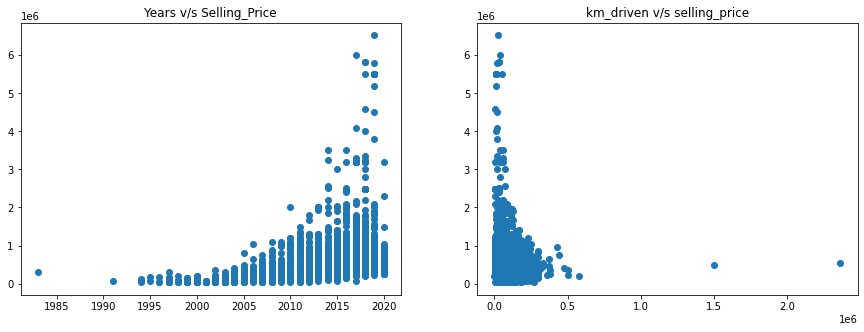

In [50]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,5))

#scatter plot 1
ax1.scatter(x=df['year'],y= df['selling_price'])
ax1.set_title('Years v/s Selling_Price')


#scatter plot 2
ax2.scatter(x=df['km_driven'],y=df['selling_price'])
ax2.set_title('km_driven v/s selling_price')

plt.draw()  

Text(0.5, 1.0, 'Seller_Type v/s Selling_Price')

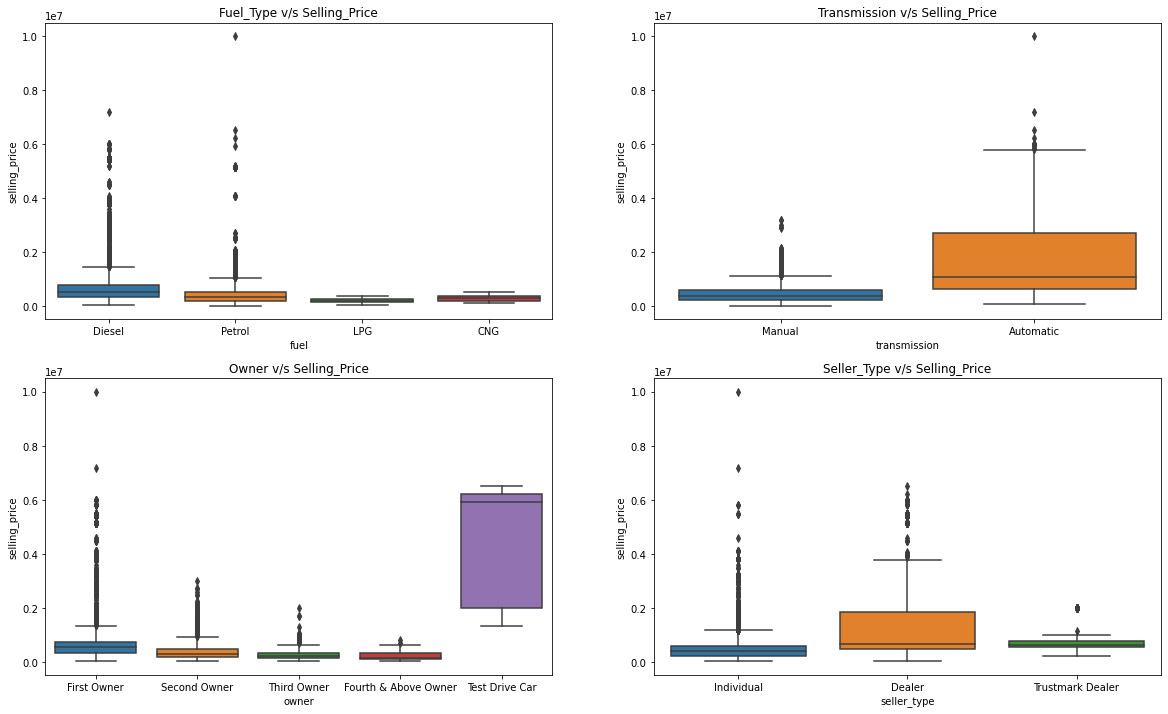

In [51]:
fig,axes = plt.subplots(2,2,figsize=(20,12))

sns.boxplot(x=cars.fuel,y=cars.selling_price,ax=axes[0][0])
axes[0][0].set_title('Fuel_Type v/s Selling_Price')

sns.boxplot(x=cars.transmission,y=cars.selling_price,ax=axes[0][1])
axes[0][1].set_title('Transmission v/s Selling_Price')

sns.boxplot(x=cars.owner,y=cars.selling_price,ax=axes[1][0])
axes[1][0].set_title('Owner v/s Selling_Price')

sns.boxplot(x=cars.seller_type,y=cars.selling_price,ax=axes[1][1])
axes[1][1].set_title('Seller_Type v/s Selling_Price')

###### Multivarate analysis


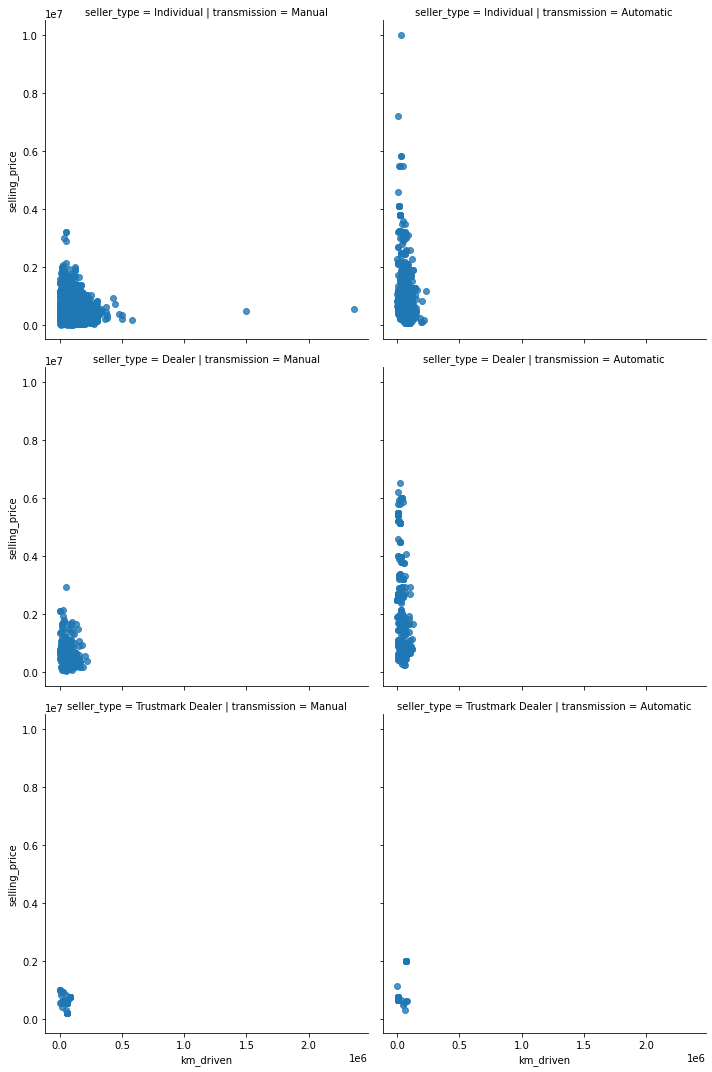

In [52]:
sns.lmplot(x='km_driven',y='selling_price',data=cars,fit_reg=False,col='transmission',row='seller_type')   
plt.show()


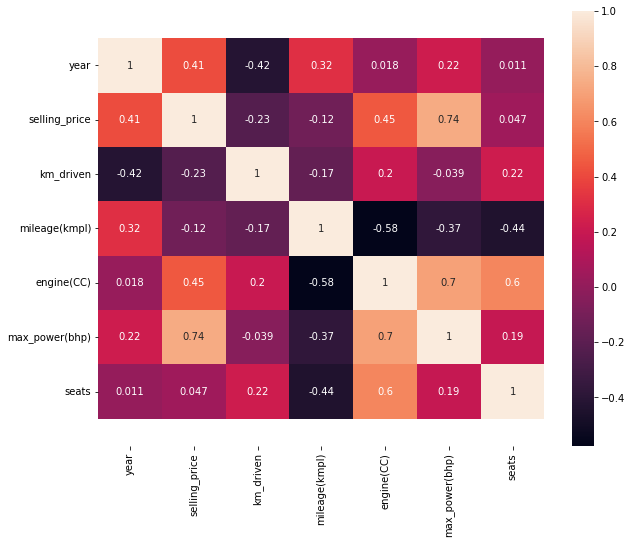

In [53]:
#Heatmap to show the correlation between various variables of the dataset

plt.figure(figsize=(10, 8))
cor = cars.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [59]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["name"] = ord_enc.fit_transform(df[["name"]])

In [60]:
df1 = df.drop(['model'],axis=1)


In [61]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(bhp),torque,seats
0,18.0,2014,450000,145500,1.0,1.0,1.0,0.0,23.40,1248,74.00,178.0,5.0
1,25.0,2014,370000,120000,1.0,1.0,1.0,2.0,21.14,1498,103.52,260.0,5.0
2,10.0,2006,158000,140000,3.0,1.0,1.0,4.0,17.70,1497,78.00,66.0,5.0
3,11.0,2010,225000,127000,1.0,1.0,1.0,0.0,23.00,1396,90.00,224.0,5.0
4,18.0,2007,130000,120000,3.0,1.0,1.0,0.0,16.10,1298,88.20,21.0,5.0


In [62]:
y = df1['selling_price']
x = df1.drop(['selling_price'],axis=1)

In [63]:
## Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5268, 12)
(2259, 12)
(5268,)
(2259,)


In [64]:
#standardization of the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler() 
x_train=sc.fit_transform(x_train)
x_train=pd.DataFrame(x_train,columns=x.columns)

x_test=sc.fit_transform(x_test)
x_test=pd.DataFrame(x_test,columns=x.columns)

In [65]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors  import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [66]:
def apply_model(model1):
    model = model1
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse=mean_squared_error(y_pred,y_test)
    mbe=mean_absolute_error(y_test, y_pred)

    r2=r2_score(y_pred,y_test)


    
    print ('Mean Square error is ', mse)
    print('Mean Absolute Error:', mbe ) 
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2 Score is', r2)
    

# Linear Regression


In [67]:
apply_model(LinearRegression())

Mean Square error is  82407015855.67917
Mean Absolute Error: 150124.5833132818
Root Mean Squared Error: 287066.22207372147
R2 Score is 0.1972402143818428


# Ridge Regression

In [68]:
apply_model(Ridge(alpha=10))

Mean Square error is  82407400409.96794
Mean Absolute Error: 150036.43786777812
Root Mean Squared Error: 287066.89187359787
R2 Score is 0.19532396028253207


# Lasso Regression

In [69]:
apply_model(Lasso(alpha=10))

Mean Square error is  82406482335.88103
Mean Absolute Error: 150115.63337075416
Root Mean Squared Error: 287065.29280963424
R2 Score is 0.1971429777370337


# K-Neighbors Regression

In [70]:
apply_model(KNeighborsRegressor(n_neighbors=2))

Mean Square error is  35498636504.73307
Mean Absolute Error: 88211.93359893758
Root Mean Squared Error: 188410.81843867956
R2 Score is 0.7651639244054442


# Decision Tree Regression

In [71]:
apply_model(DecisionTreeRegressor(max_depth=8))

Mean Square error is  58612103869.487335
Mean Absolute Error: 103543.46471996936
Root Mean Squared Error: 242099.36775937135
R2 Score is 0.6575763225969924


# Random Forest Regression

In [72]:
apply_model(RandomForestRegressor(n_estimators=100,
                      random_state=3,
                      max_samples=0.5,
                      max_features=0.75,
                      max_depth=15))

Mean Square error is  25265480311.536404
Mean Absolute Error: 80414.52741170318
Root Mean Squared Error: 158951.18845587914
R2 Score is 0.8098037212871056


# Gradient Boosting Regression

In [73]:
apply_model(GradientBoostingRegressor(n_estimators=500))

Mean Square error is  31035624245.006958
Mean Absolute Error: 81643.04051845806
Root Mean Squared Error: 176169.30562673783
R2 Score is 0.7966579229706432


# AdaBoost Regression

In [74]:
apply_model(AdaBoostRegressor(n_estimators=15,learning_rate=1.0))

Mean Square error is  45354058970.665985
Mean Absolute Error: 138052.20121179326
Root Mean Squared Error: 212964.92427314408
R2 Score is 0.5692477943676401


# ExtraTrees Regression

In [75]:
apply_model(ExtraTreesRegressor(n_estimators=100,
                      random_state=3,
                      max_samples=0.5,
                      max_features=0.75,
                      max_depth=15))

Mean Square error is  20947714815.29576
Mean Absolute Error: 71308.93610282226
Root Mean Squared Error: 144733.25400645065
R2 Score is 0.8503439297783106


# SVR

In [76]:
apply_model(SVR())

Mean Square error is  185555603718.35263
Mean Absolute Error: 241423.59877985882
Root Mean Squared Error: 430761.6553482362
R2 Score is -3697214.6369220284


When compared to all models Random Forest regressor is the best model

# Random Forest Regression Model

In [78]:
rf=(RandomForestRegressor(n_estimators=100,
                      random_state=3,
                      max_samples=0.5,
                      max_features=0.75,
                      max_depth=15))
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
mbe=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_pred,y_test)

print('Mean Absolute Error:', mbe ) 

print ('Mean Square error is ', mse)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print ('R2 Score is', r2)
    

Mean Absolute Error: 80414.52741170318
Mean Square error is  25265480311.536404
Root Mean Squared Error: 158951.18845587914
R2 Score is 0.8098037212871056


In [79]:
# compare the actual output values for X_test with the predicted values

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.reset_index(inplace=True,drop=True)
df1

,Actual,Predicted
0,229999,1.818853e+05
1,430000,4.484714e+05
2,2475000,2.221530e+06
3,690000,5.487503e+05
4,400000,4.432034e+05
...,...,...
2254,680000,5.643710e+05
2255,550000,5.606274e+05
2256,300000,2.620471e+05
2257,480000,1.078970e+06


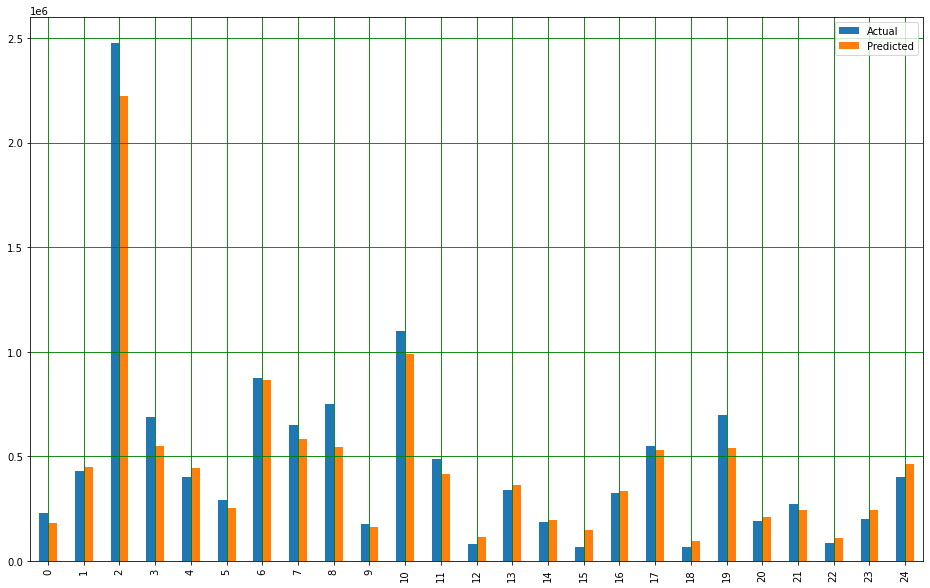

In [80]:
#Showing the difference between the actual and predicted value

df2 = df1.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.9', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.9', color='black')
plt.show()

# Pickle dump

In [81]:
import pickle

### Exporting the model

In [83]:
pickle.dump(rf,open('rf models.pkl','wb'))
